In [1]:
!unzip 'Brain-Tumor-Classification-DataSet-master.zip'

Archive:  Brain-Tumor-Classification-DataSet-master.zip
3ea9f4eae54c67e5bddbf6f7a73582967a5f5f79
   creating: Brain-Tumor-Classification-DataSet-master/
   creating: Brain-Tumor-Classification-DataSet-master/Testing/
   creating: Brain-Tumor-Classification-DataSet-master/Testing/glioma_tumor/
  inflating: Brain-Tumor-Classification-DataSet-master/Testing/glioma_tumor/image(1).jpg  
  inflating: Brain-Tumor-Classification-DataSet-master/Testing/glioma_tumor/image(10).jpg  
  inflating: Brain-Tumor-Classification-DataSet-master/Testing/glioma_tumor/image(100).jpg  
  inflating: Brain-Tumor-Classification-DataSet-master/Testing/glioma_tumor/image(11).jpg  
  inflating: Brain-Tumor-Classification-DataSet-master/Testing/glioma_tumor/image(12).jpg  
  inflating: Brain-Tumor-Classification-DataSet-master/Testing/glioma_tumor/image(13).jpg  
  inflating: Brain-Tumor-Classification-DataSet-master/Testing/glioma_tumor/image(14).jpg  
  inflating: Brain-Tumor-Classification-DataSet-master/Testing


   creating: Brain-Tumor-Classification-DataSet-master/Testing/meningioma_tumor/
  inflating: Brain-Tumor-Classification-DataSet-master/Testing/meningioma_tumor/image(1).jpg  
  inflating: Brain-Tumor-Classification-DataSet-master/Testing/meningioma_tumor/image(10).jpg  
  inflating: Brain-Tumor-Classification-DataSet-master/Testing/meningioma_tumor/image(100).jpg  
  inflating: Brain-Tumor-Classification-DataSet-master/Testing/meningioma_tumor/image(102).jpg  
  inflating: Brain-Tumor-Classification-DataSet-master/Testing/meningioma_tumor/image(106).jpg  
  inflating: Brain-Tumor-Classification-DataSet-master/Testing/meningioma_tumor/image(107).jpg  
  inflating: Brain-Tumor-Classification-DataSet-master/Testing/meningioma_tumor/image(109).jpg  
  inflating: Brain-Tumor-Classification-DataSet-master/Testing/meningioma_tumor/image(11).jpg  
  inflating: Brain-Tumor-Classification-DataSet-master/Testing/meningioma_tumor/image(112).jpg  
  inflating: Brain-Tumor-Classification-DataSet-m

In [2]:
import os
import matplotlib.pyplot as plt
import shutil
import random
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0

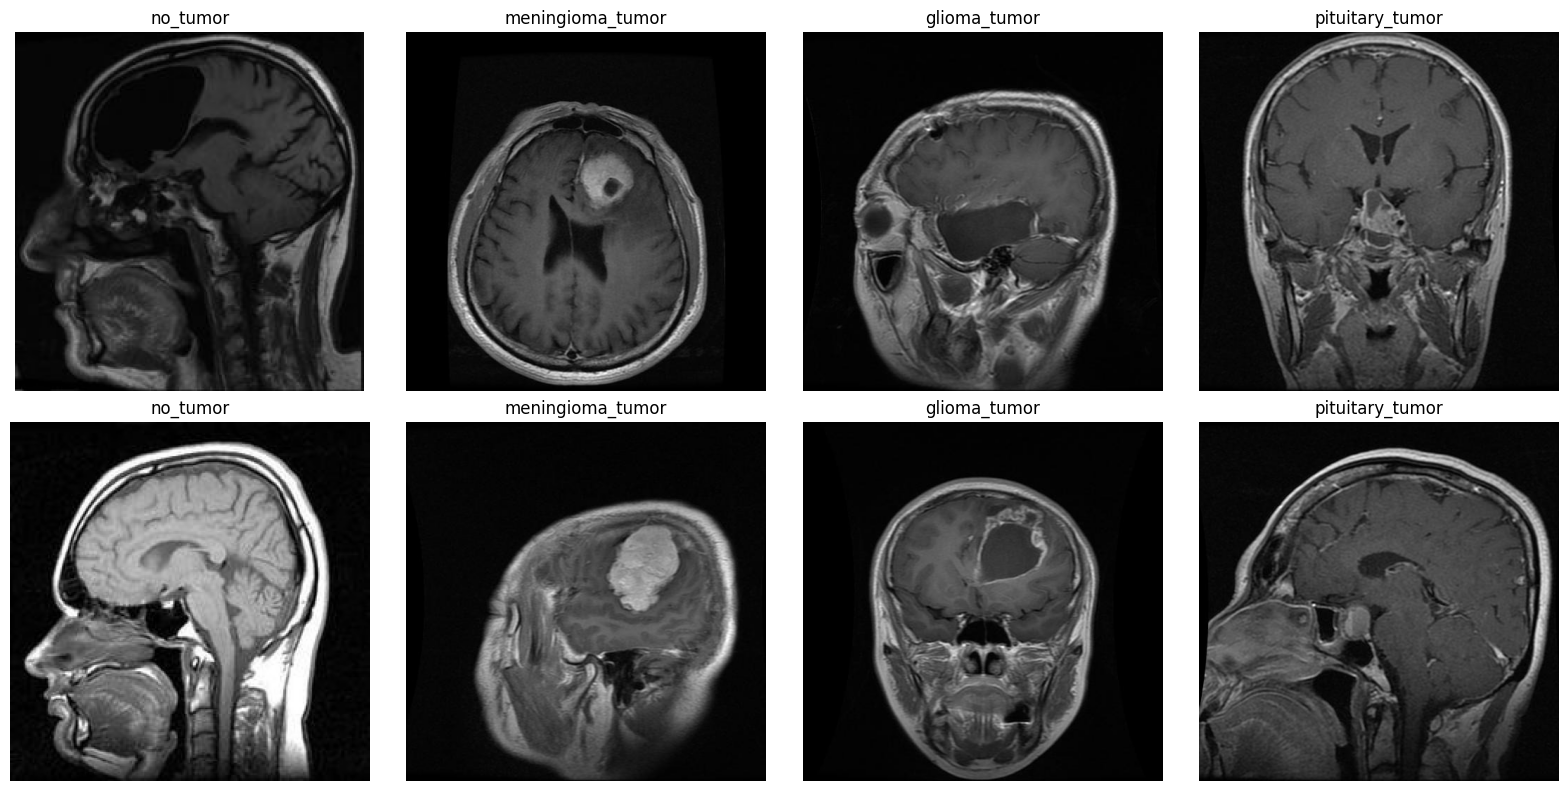

In [3]:
base_path = './Brain-Tumor-Classification-DataSet-master/Training'
labels = os.listdir(base_path)

labels = list(filter(lambda x: x != '.DS_Store', labels))

# Create subplots with 2 rows and as many columns as unique labels
fig, axes = plt.subplots(2, len(labels), figsize=(16, 8))

# Filter out any unwanted files
labels = list(filter(lambda x: x != '.DS_Store', labels))

for idx, label in enumerate(labels):
    imgs_under_label = os.listdir(os.path.join(base_path, label))
    
    # Iterate over the first two images for each label
    for i, img in enumerate(imgs_under_label[:2]):
        # Display image in the corresponding subplot
        axes[i, idx].imshow(plt.imread(os.path.join(base_path, label, img)))
        axes[i, idx].set_title(label)
        axes[i, idx].axis('off')

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()


#### Take some randomly from each category for later testing with the website

In [4]:
!mkdir "website-testing" "website-testing/meningioma_tumor" "website-testing/glioma_tumor" "website-testing/pituitary_tumor" "website-testing/no_tumor"

In [5]:
# Source and destination directories
source_dirs = ["Brain-Tumor-Classification-DataSet-master/Testing/" + i for i in labels]
destination_dirs = ["website-testing/" + i for i in labels]

# Number of files to move from each source directory
num_files_to_move = 15

# Move files randomly from each source directory to the corresponding destination directory
for source_dir, destination_dir in zip(source_dirs, destination_dirs):
    # Ensure destination directory exists
    os.makedirs(destination_dir, exist_ok=True)
    
    # List all files in the source directory
    files_to_move = os.listdir(source_dir)
    
    # Randomly select num_files_to_move files
    files_to_move = random.sample(files_to_move, num_files_to_move)
    
    # Move selected files to the destination directory
    for file in files_to_move:
        file_path = os.path.join(source_dir, file)
        destination_path = os.path.join(destination_dir, file)
        shutil.move(file_path, destination_path)

#### Prepare the tensorflow data

In [6]:
import tensorflow as tf

In [7]:
# this makes sure GPU is allocated on demand not upfront
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
X_train = []
y_train = []
image_size = 150
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('./Brain-Tumor-Classification-DataSet-master/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('./Brain-Tumor-Classification-DataSet-master/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

In [9]:
X_train,y_train=shuffle(X_train,y_train,random_state=101)
X_train.shape

(3204, 150, 150, 3)

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=.1,random_state=101)

In [11]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))

y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping(
  min_delta=1e-7,
  patience=5,
  restore_best_weights=True
)

In [13]:
# auto adjust leanring rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)

In [14]:
# Create a Sequential model
model = Sequential([
  Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3), padding='valid'),
  BatchNormalization(),
  MaxPooling2D(),
  Dropout(0.2),
  
  Conv2D(32, (3, 3), activation='relu', padding='valid'),
  BatchNormalization(),
  MaxPooling2D(),
  Dropout(0.2),
  
  Conv2D(64, (3, 3), activation='relu', padding='valid'),
  Conv2D(64, (3, 3), activation='relu', padding='valid'),
  BatchNormalization(),
  MaxPooling2D(),
  Dropout(0.4),
  
  Flatten(),
  Dense(64, activation='relu'),
  Dropout(0.5),
  
  Dense(4, activation='softmax')
])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [15]:
model.compile(
  optimizer=tf.optimizers.Adam(learning_rate=3e-5),
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 32)        1

In [17]:
hist = model.fit(
  X_train,
  y_train,
  epochs=50,
  validation_split=0.1,
  callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<32x74x74x16xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<32x36x36x32xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerform

 1/82 [..............................] - ETA: 1:33 - loss: 6.2519 - accuracy: 0.1562

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<32x36x36x32xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<32x74x74x16xi1>'


81/82 [============================>.] - ETA: 0s - loss: 2.2206 - accuracy: 0.3843

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<2x74x74x16xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<2x36x36x32xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerforman

82/82 [==============================] - ETA: 0s - loss: 2.2204 - accuracy: 0.3840

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<2x36x36x32xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<2x74x74x16xi1>'


82/82 [==============================] - 5s 47ms/step - loss: 2.2204 - accuracy: 0.3840 - val_loss: 1.1982 - val_accuracy: 0.4325 - lr: 3.0000e-05
Epoch 2/50
82/82 [==============================] - 3s 37ms/step - loss: 1.3407 - accuracy: 0.4576 - val_loss: 1.0505 - val_accuracy: 0.6194 - lr: 3.0000e-05
Epoch 3/50
82/82 [==============================] - 3s 36ms/step - loss: 1.1226 - accuracy: 0.5254 - val_loss: 0.9061 - val_accuracy: 0.6644 - lr: 3.0000e-05
Epoch 4/50
82/82 [==============================] - 3s 34ms/step - loss: 1.0694 - accuracy: 0.5555 - val_loss: 0.8180 - val_accuracy: 0.6920 - lr: 3.0000e-05
Epoch 5/50
82/82 [==============================] - 3s 34ms/step - loss: 0.9722 - accuracy: 0.6037 - val_loss: 0.7504 - val_accuracy: 0.6747 - lr: 3.0000e-05
Epoch 6/50
82/82 [==============================] - 3s 34ms/step - loss: 0.9277 - accuracy: 0.6180 - val_loss: 0.7289 - val_accuracy: 0.6851 - lr: 3.0000e-05
Epoch 7/50
82/82 [==============================] - 3s 34ms/ste

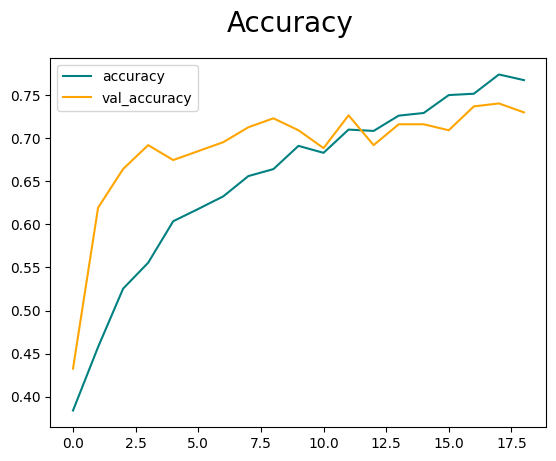

In [18]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

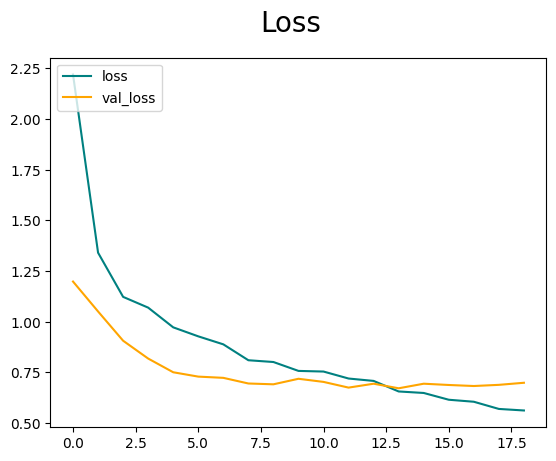

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [20]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
y_pred = model.predict(X_test)

y_pred_max = np.argmax(y_pred, axis=1)
y_test_max = np.argmax(y_test, axis=1)

print(classification_report(y_test_max, y_pred_max, target_names=labels))
print(confusion_matrix(y_test_max, y_pred_max))

11/11 [==============================] - 0s 15ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.67      0.87      0.75        99
        no_tumor       0.86      0.72      0.78        53
meningioma_tumor       0.76      0.32      0.45        87
 pituitary_tumor       0.68      0.93      0.79        82

        accuracy                           0.71       321
       macro avg       0.74      0.71      0.69       321
    weighted avg       0.73      0.71      0.69       321

[[86  3  5  5]
 [ 2 38  4  9]
 [35  3 28 21]
 [ 6  0  0 76]]


In [22]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(150,150,3))

In [23]:
eff_model=effnet.output
eff_model=tf.keras.layers.GlobalAveragePooling2D()(eff_model)
eff_model=tf.keras.layers.Dropout(.5)(eff_model)
eff_model=tf.keras.layers.Dense(4,activation='softmax')(eff_model)
eff_model=tf.keras.Model(inputs=effnet.input,outputs=eff_model)
eff_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 150, 150, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 150, 150, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 150, 150, 3)          0         ['normalization[0][0]']   

In [24]:
eff_model.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adam(lr=3e-5) ,metrics='accuracy')

In [25]:
eff_history=eff_model.fit(X_train,y_train,epochs=50,validation_split=.1,callbacks=[early_stopping,reduce_lr])

Epoch 1/50


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<32x1x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<32x1x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceSh

81/82 [============================>.] - ETA: 0s - loss: 0.5154 - accuracy: 0.8071

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<2x1x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<2x1x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShad

82/82 [==============================] - 41s 382ms/step - loss: 0.5151 - accuracy: 0.8072 - val_loss: 0.4902 - val_accuracy: 0.8651 - lr: 0.0010
Epoch 2/50
82/82 [==============================] - 19s 223ms/step - loss: 0.2362 - accuracy: 0.9152 - val_loss: 0.2331 - val_accuracy: 0.9066 - lr: 0.0010
Epoch 3/50
82/82 [==============================] - 18s 221ms/step - loss: 0.1620 - accuracy: 0.9453 - val_loss: 0.2652 - val_accuracy: 0.8893 - lr: 0.0010
Epoch 4/50
82/82 [==============================] - 18s 220ms/step - loss: 0.1229 - accuracy: 0.9638 - val_loss: 0.4114 - val_accuracy: 0.8893 - lr: 0.0010
Epoch 5/50
82/82 [==============================] - 18s 216ms/step - loss: 0.0877 - accuracy: 0.9734 - val_loss: 0.7418 - val_accuracy: 0.7751 - lr: 0.0010
Epoch 6/50
82/82 [==============================] - 19s 226ms/step - loss: 0.0530 - accuracy: 0.9815 - val_loss: 0.1077 - val_accuracy: 0.9550 - lr: 2.0000e-04
Epoch 7/50
82/82 [==============================] - 18s 224ms/step - lo

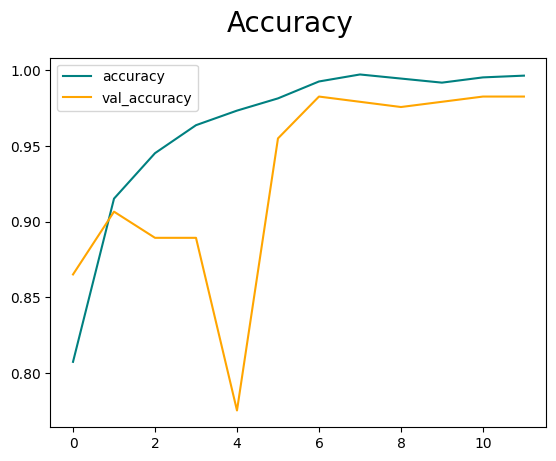

In [26]:
fig = plt.figure()
plt.plot(eff_history.history['accuracy'], color='teal', label='accuracy')
plt.plot(eff_history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

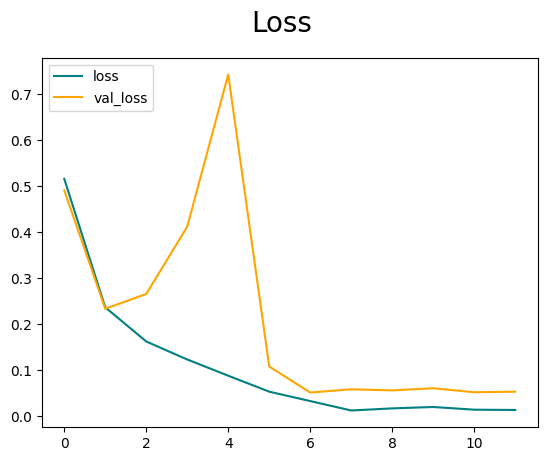

In [27]:
fig = plt.figure()
plt.plot(eff_history.history['loss'], color='teal', label='loss')
plt.plot(eff_history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [28]:
eff_y_pred = eff_model.predict(X_test)

eff_y_pred_max = np.argmax(eff_y_pred, axis=1)
y_test_max = np.argmax(y_test, axis=1)

print(classification_report(y_test_max, eff_y_pred_max, target_names=labels))

11/11 [==============================] - 5s 236ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.97      0.97      0.97        99
        no_tumor       0.98      1.00      0.99        53
meningioma_tumor       0.96      0.93      0.95        87
 pituitary_tumor       0.96      0.99      0.98        82

        accuracy                           0.97       321
       macro avg       0.97      0.97      0.97       321
    weighted avg       0.97      0.97      0.97       321



In [29]:
conf_matrix = confusion_matrix(y_test_max, eff_y_pred_max)


# Print confusion matrix with labels
print("Confusion Matrix:")
print("{:<32} {:<32} {:<32} {:<32} {:<32}".format("", *map(lambda x: f"True {x}", labels)))
for i, label in enumerate(labels):
    print("{:<32} {:<32} {:<32} {:<32} {:<32}".format(f"Predicted {label}", *conf_matrix[i]))

Confusion Matrix:
                                 True glioma_tumor                True no_tumor                    True meningioma_tumor            True pituitary_tumor            
Predicted glioma_tumor           96                               0                                3                                0                               
Predicted no_tumor               0                                53                               0                                0                               
Predicted meningioma_tumor       2                                1                                81                               3                               
Predicted pituitary_tumor        1                                0                                0                                81                              


In [30]:
# np.sum(conf_matrix)
np.diag(conf_matrix)

array([96, 53, 81, 81])

## So the EfficientNetB0 model is better than the custom model.

In [31]:
# calculate the specificity
TN = np.sum(conf_matrix) - np.diag(conf_matrix)

# False positives for each class
FP = np.sum(conf_matrix, axis=0) - np.diag(conf_matrix)

# Individual Specificity for each class
specificity = TN / (TN + FP)

print("Individual Specificity for each class:")
for label in labels:
    print(f"{label}: {specificity[labels.index(label)]}")

# average specificity
print(f"Average Specificity: {np.mean(specificity)}")


Individual Specificity for each class:
glioma_tumor: 0.9868421052631579
no_tumor: 0.9962825278810409
meningioma_tumor: 0.9876543209876543
pituitary_tumor: 0.9876543209876543
Average Specificity: 0.9896083187798768


In [32]:
# calculate the sensitivity
TP = np.diag(conf_matrix)

# False negatives for each class
FN = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)

# Individual Sensitivity for each class
sensitivity = TP / (TP + FN)

print("Individual Sensitivity for each class:")
for label in labels:
    print(f"{label}: {sensitivity[labels.index(label)]}")

# average specificity
print(f"Average Sensitivity: {np.mean(sensitivity)}")

Individual Sensitivity for each class:
glioma_tumor: 0.9696969696969697
no_tumor: 1.0
meningioma_tumor: 0.9310344827586207
pituitary_tumor: 0.9878048780487805
Average Sensitivity: 0.9721340826260927


In [33]:
# save model
eff_model.save('./server/brain_tumor_model.h5')

/Users/alfredonuada/miniconda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
